In [ ]:
from src.load_data import *
from src.model import *
from src.training import *

## Create the data


In [ ]:

train_loader , test_loader = create_data()

images, labels = next(iter(train_loader))
print("Batch X shape:", images.shape)
print("Batch y shape:", labels.shape)

Batch X shape: torch.Size([32, 3, 64, 64])
Batch y shape: torch.Size([32])


## Plot some images from CIFAR10


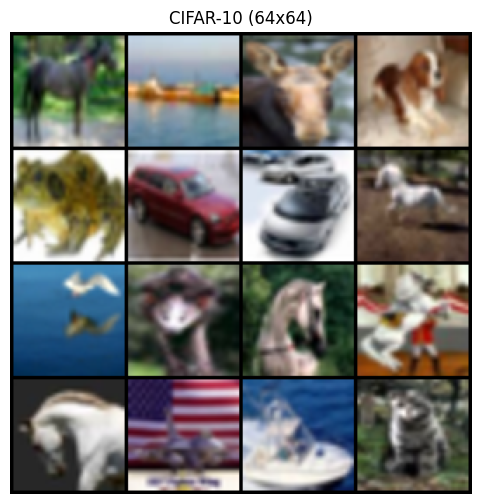

In [4]:
grid = vutils.make_grid(images[:16], nrow=4, normalize=True, scale_each=True)
plt.figure(figsize=(6,6))
plt.axis("off")
plt.title("CIFAR-10 (64x64)")
plt.imshow(grid.permute(1, 2, 0).numpy())
plt.show()

## Create the models


In [ ]:
import torch.optim as optim
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

latent_dim = 100
gen = Generator(latent_dim=latent_dim, ngf=64, img_channels=3).to(device)
disc = Discriminator(img_channels=3, base=64, max_ch=1024, p_drop=0.5).to(device)

gen.apply(weights_init_normal)
disc.apply(weights_init_normal)

criterion = nn.BCEWithLogitsLoss()
optimizerGen = optim.Adam(gen.parameters(), lr=2e-4, betas=(0.5, 0.999))
optimizerDisc = optim.Adam(disc.parameters(), lr=2e-4, betas=(0.5, 0.999))

## Train the model


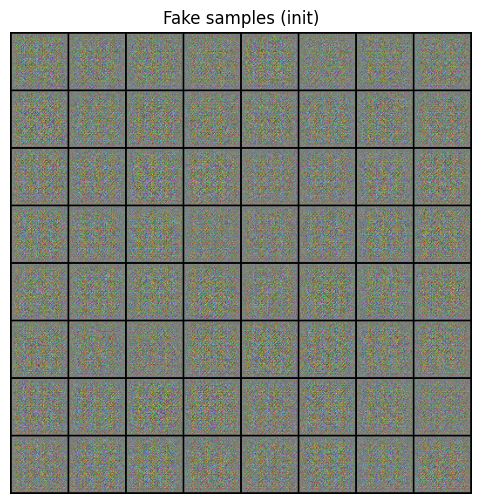

[Epoch 001/30]  loss_D=0.6672 | loss_G=2.5245


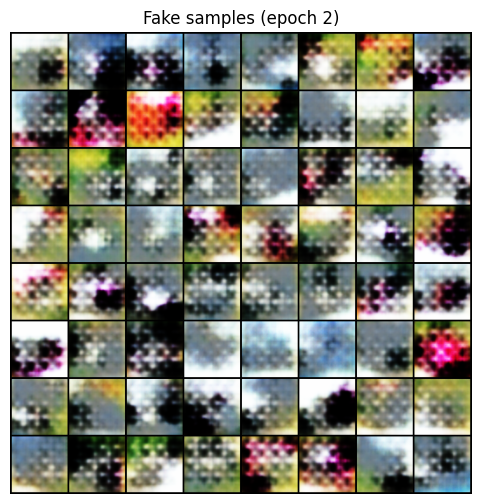

[Epoch 003/30]  loss_D=0.7024 | loss_G=1.5834


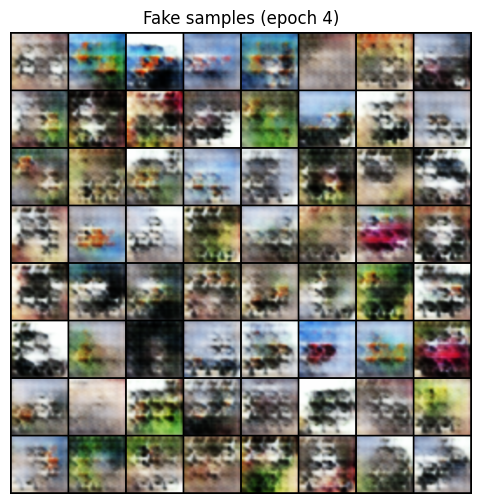

[Epoch 005/30]  loss_D=0.6908 | loss_G=1.3509


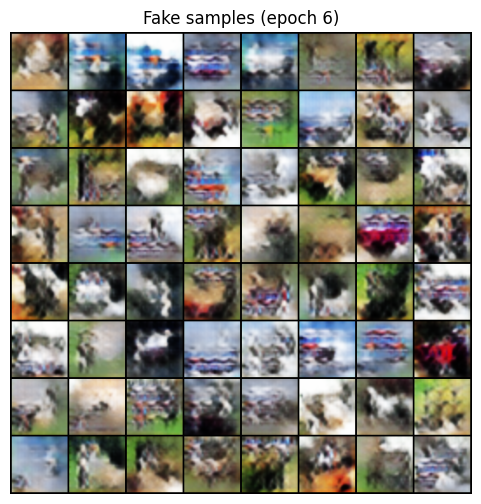

[Epoch 007/30]  loss_D=0.6680 | loss_G=1.2973


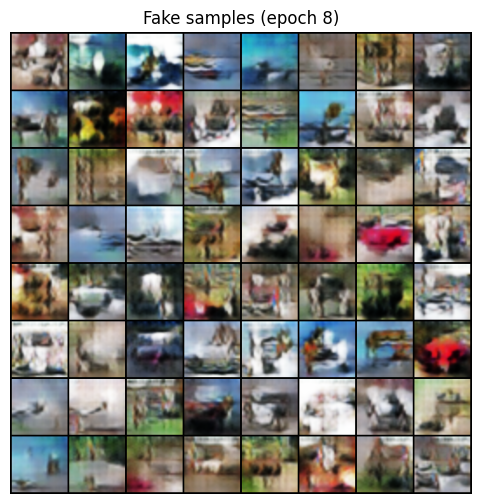

[Epoch 009/30]  loss_D=0.6557 | loss_G=1.2621


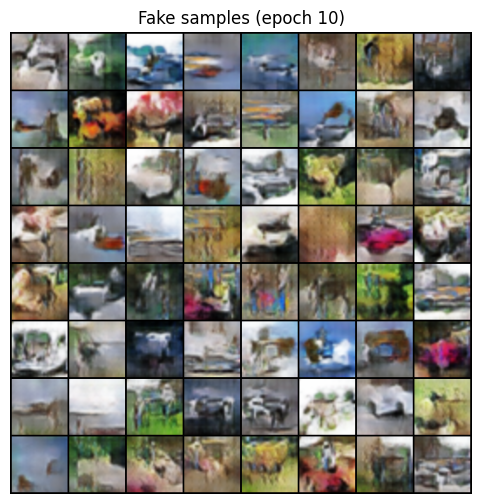

[Epoch 011/30]  loss_D=0.6346 | loss_G=1.3065


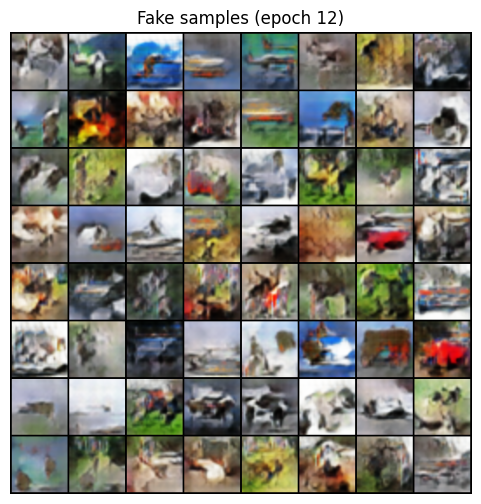

[Epoch 013/30]  loss_D=0.6507 | loss_G=1.2168


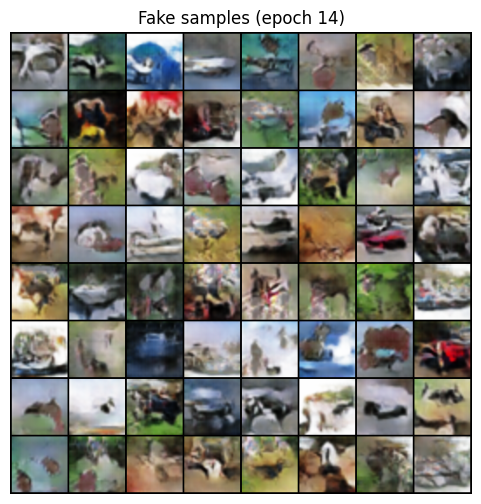

[Epoch 015/30]  loss_D=0.6489 | loss_G=1.1937


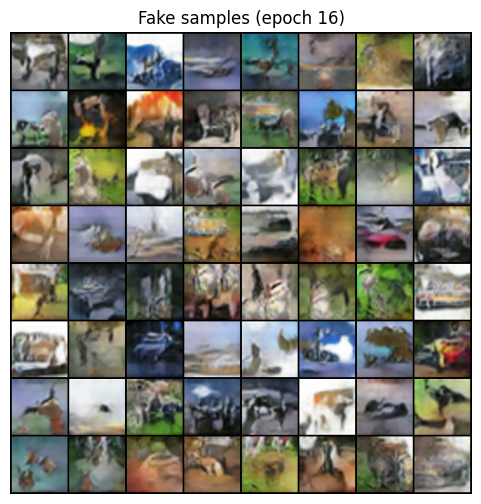

[Epoch 017/30]  loss_D=0.6489 | loss_G=1.2002


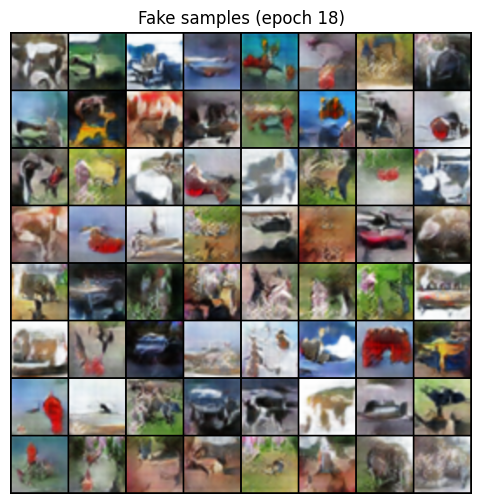

[Epoch 019/30]  loss_D=0.6491 | loss_G=1.1580


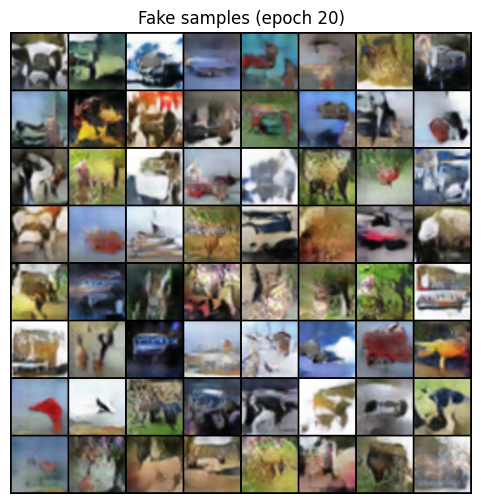

[Epoch 021/30]  loss_D=0.6493 | loss_G=1.1709


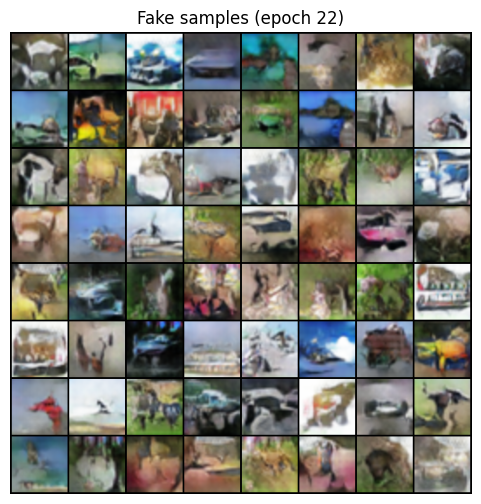

[Epoch 023/30]  loss_D=0.6405 | loss_G=1.1695


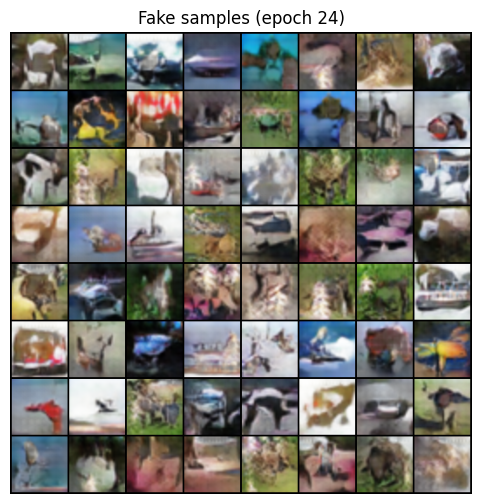

[Epoch 025/30]  loss_D=0.6366 | loss_G=1.1676


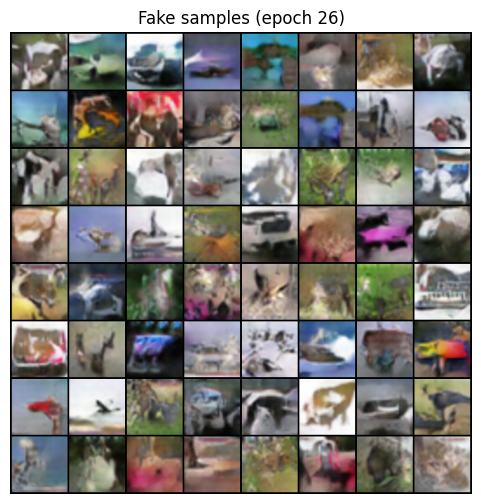

[Epoch 027/30]  loss_D=0.6227 | loss_G=1.1736


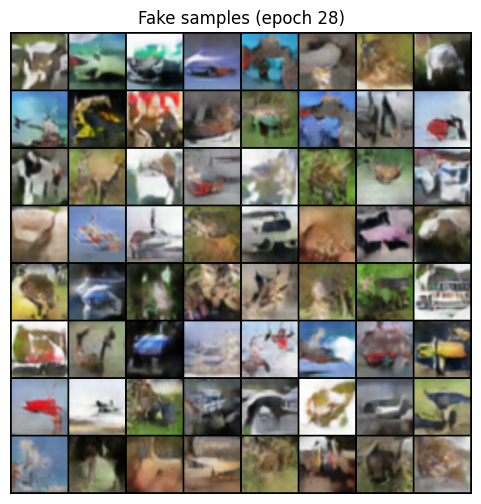

[Epoch 029/30]  loss_D=0.6146 | loss_G=1.2112


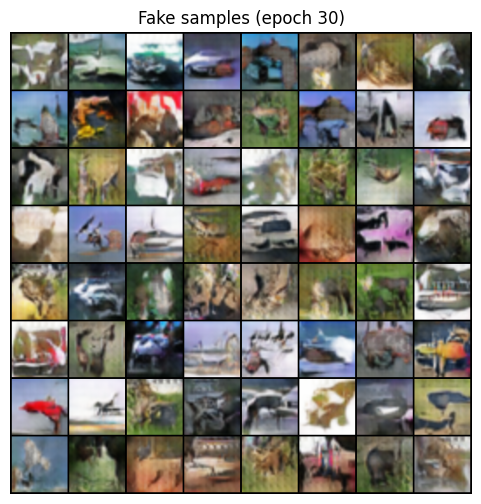

In [15]:
history = train_gan( train_loader=train_loader,
    generador=gen, discriminador=disc, optimizerG=optimizerGen, optimizerD=optimizerDisc,
    criterion=criterion,
    latent_dim=100, epochs=30, sample_every=1 , smooth_advance=True)

## Save the models


In [16]:
torch.save(gen.state_dict(), "Generador_30epochs.pth")
torch.save(disc.state_dict(), "Discriminador_30epochs.pth")